In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf

# Load dataset with 80% train / 20% validation split
(train_ds, val_ds), info = tfds.load(
    "cats_vs_dogs",
    split=["train[:80%]", "train[80%:]"],
    with_info=True,
    as_supervised=True   # returns (image, label) pairs
)

print("Classes:", info.features["label"].names)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.CKYEEX_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.
Classes: ['cat', 'dog']


This code loads the "cats_vs_dogs" dataset from TensorFlow Datasets (TFDS) and splits it into training and validation sets. Let me explain each line in detail:

```python
import tensorflow_datasets as tfds
import tensorflow as tf
```
- These lines import the TensorFlow Datasets library (as `tfds`) and TensorFlow library (as `tf`).

```python
(train_ds, val_ds), info = tfds.load(
```
- This starts loading a dataset using `tfds.load()`, which will return:
  - A tuple containing the training and validation datasets `(train_ds, val_ds)`
  - Dataset metadata in `info`

```python
    "cats_vs_dogs",
```
- Specifies which dataset to load - in this case, the "cats_vs_dogs" dataset which contains images of cats and dogs.

```python
    split=["train[:80%]", "train[80%:]"],
```
- Defines how to split the dataset:
  - `train[:80%]` - first 80% of the training data (will be assigned to `train_ds`)
  - `train[80%:]` - remaining 20% of the training data (will be assigned to `val_ds`)

```python
    with_info=True,
```
- Requests that the dataset metadata (information about the dataset) be returned along with the data.

```python
    as_supervised=True   # returns (image, label) pairs
)
```
- Specifies that the dataset should be returned in supervised format (image, label) pairs rather than as a dictionary.

```python
print("Classes:", info.features["label"].names)
```
- Prints the class names from the dataset metadata:
  - `info.features["label"]` accesses the label feature information
  - `.names` gives the human-readable class names (in this case, probably ["cat", "dog"])

The end result is:
1. `train_ds` contains 80% of the images for training
2. `val_ds` contains 20% of the images for validation
3. Both datasets contain (image, label) pairs
4. The code prints out the class names that correspond to the labels

In [ ]:
for images, labels in train_ds.take(1):
    print(images.shape)

(32, 150, 150, 3)


In [ ]:
IMG_SIZE = 150

def format_image(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image / 255.0
    return image, label

BATCH_SIZE = 32

train_ds = train_ds.map(format_image).shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.map(format_image).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


This code preprocesses the training and validation datasets (`train_ds` and `val_ds`) to prepare them for training a neural network. Let's break it down line by line:

### 1. Image Size Constant
```python
IMG_SIZE = 150
```
- Defines the target size (height and width in pixels) to which all images will be resized (150x150 in this case).

---

### 2. Image Preprocessing Function
```python
def format_image(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image / 255.0
    return image, label
```
- **`format_image`** is a function that takes an `(image, label)` pair and applies preprocessing:
  1. **Resizing**:  
     ```python
     image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
     ```
     - Resizes the image to `(150, 150)` using TensorFlow's `resize` function.
  2. **Normalization**:  
     ```python
     image = image / 255.0
     ```
     - Scales pixel values from `[0, 255]` to `[0, 1]` (a common practice for neural networks).
  3. Returns the processed `(image, label)` pair.

---

### 3. Batch Size
```python
BATCH_SIZE = 32
```
- Defines the number of samples per batch during training (32 images per batch).

---

### 4. Training Dataset Pipeline (`train_ds`)
```python
train_ds = train_ds.map(format_image).shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
```
- Applies a series of transformations to the training dataset:
  1. **`.map(format_image)`**:  
     - Applies the `format_image` function to each `(image, label)` pair in the dataset.
  2. **`.shuffle(1000)`**:  
     - Randomly shuffles the dataset with a buffer size of 1000 (helps reduce overfitting by randomizing order).
  3. **`.batch(BATCH_SIZE)`**:  
     - Groups the dataset into batches of 32 samples each.
  4. **`.prefetch(tf.data.AUTOTUNE)`**:  
     - Optimizes performance by prefetching batches in the background (while the model trains on the current batch).

---

### 5. Validation Dataset Pipeline (`val_ds`)
```python
val_ds = val_ds.map(format_image).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
```
- Similar to the training pipeline, but **without shuffling** (since validation data order doesn't matter):
  1. **`.map(format_image)`**: Preprocesses each image.
  2. **`.batch(BATCH_SIZE)`**: Batches into groups of 32.
  3. **`.prefetch(tf.data.AUTOTUNE)`**: Optimizes performance.

---

### Final Output:
- Both `train_ds` and `val_ds` are now **batched, preprocessed, and optimized** for efficient training with:
  - Resized images (`150x150`).
  - Normalized pixel values (`[0, 1]`).
  - Batches of 32 samples.
  - Prefetching for performance.

### How Image Resizing Works in TensorFlow (`tf.image.resize`)

When you call `tf.image.resize(image, (IMG_SIZE, IMG_SIZE))`, TensorFlow transforms the image to the target dimensions (e.g., `150x150`). Here’s what happens under the hood:

---

### **1. Resizing Methods (Interpolation)**
TensorFlow uses **interpolation** to map pixels from the original image to the new size. The default method is **bilinear interpolation**, but others are available:
- **Bilinear**: Smooth blending of nearby pixels (default).
- **Nearest Neighbor**: Copies the nearest pixel (fast but blocky).
- **Bicubic**: Higher-quality smoothing (slower but sharper).
- **Area**: Averaging pixels (good for downscaling).

---

### **2. What Happens to "Extra" Pixels?**
- **Downscaling (e.g., `300x300` → `150x150`)**:
  - Pixels are **merged** (averaged or interpolated) to fit the smaller size.
  - Information is lost, but key features are preserved.

- **Upscaling (e.g., `100x100` → `150x150`)**:
  - New pixels are **estimated** from existing ones (via interpolation).
  - May introduce blurriness (no new details are created).

---

### **3. Can We Resize Any Image?**
- **Yes**, but with caveats:
  1. **Aspect Ratio**:
     - By default, `resize` **stretches** the image to fit the target dimensions, distorting it if the aspect ratio changes.
     - To preserve aspect ratio, use:
       ```python
       # Maintain aspect ratio by padding (adds black bars)
       image = tf.image.resize_with_pad(image, 150, 150)
       ```
       or cropping:
       ```python
       # Crop to a central square first
       image = tf.image.resize_with_crop_or_pad(image, min_side, min_side)
       image = tf.image.resize(image, (150, 150))
       ```

  2. **Color Channels**:
     - Works for grayscale (1 channel), RGB (3 channels), or RGBA (4 channels).

  3. **Data Type**:
     - Input can be `uint8` (`0-255`) or `float` (`0.0-1.0`). Output is always `float32`.

---

### **4. Practical Implications**
- **Downscaling**:
  - Reduces computational cost but may lose fine details.
  - Example: A cat’s whiskers might become less distinct.

- **Upscaling**:
  - Rarely improves quality; avoid unless necessary (e.g., for model compatibility).

---

### **Key Takeaways**
1. **Interpolation determines quality** (bilinear is a good default).
2. **Aspect ratio distortion** happens unless handled explicitly.
3. **Downscaling is common** for efficiency; upscaling is rarely useful.
4. **Normalization** (`/255.0`) should happen **after** resizing to avoid artifacts.


In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3)),  # <-- define input here
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # binary classification
])


This code defines a **Convolutional Neural Network (CNN)** using TensorFlow/Keras for binary image classification (e.g., cats vs. dogs). Let's break it down layer by layer:

---

### **1. Model Architecture**
The model is a `Sequential` stack of layers:

#### **Input Layer**
```python
layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
```
- **Purpose**: Explicitly defines the input shape (`150x150` RGB images in your case).  
- **Why?** Ensures the model knows the expected dimensions of incoming data.  
- **Note**: Earlier Keras versions required `InputLayer`; now `Input()` is preferred.

---

#### **Convolutional Blocks (Feature Extraction)**
Three blocks of **Conv2D + MaxPooling2D**:
1. **First Block**:
   ```python
   layers.Conv2D(32, (3,3), activation='relu'),
   layers.MaxPooling2D(2,2)
   ```
   - `Conv2D(32, (3,3))`: 32 filters, each `3x3`, with ReLU activation.  
     - Extracts low-level features (edges, textures).  
   - `MaxPooling2D(2,2)`: Downsamples feature maps by taking the max value in `2x2` windows.  
     - Reduces spatial dimensions (helps with translation invariance).  

2. **Second Block**:
   ```python
   layers.Conv2D(64, (3,3), activation='relu'),
   layers.MaxPooling2D(2,2)
   ```
   - 64 filters to capture mid-level features (e.g., shapes, patterns).  

3. **Third Block**:
   ```python
   layers.Conv2D(128, (3,3), activation='relu'),
   layers.MaxPooling2D(2,2)
   ```
   - 128 filters for high-level features (e.g., facial features for cats/dogs).  

---

#### **Classifier Head (Dense Layers)**
```python
layers.Flatten(),
layers.Dense(128, activation='relu'),
layers.Dense(1, activation='sigmoid')
```
1. **`Flatten()`**:  
   - Converts the 3D feature maps (`(height, width, channels)`) into a 1D vector for dense layers.  
   - Example: If the last MaxPooling outputs `(None, 18, 18, 128)`, flattening gives `(None, 18*18*128) = (None, 41472)`.  

2. **`Dense(128, activation='relu')`**:  
   - Fully connected layer with 128 neurons for non-linear combinations of features.  

3. **`Dense(1, activation='sigmoid')`**:  
   - Output layer with 1 neuron (binary classification: `0` = cat, `1` = dog).  
   - `sigmoid` squashes outputs to `[0, 1]` (probability of being class `1`).  

---

### **2. Key Design Choices**
- **Why ReLU?**: Avoids vanishing gradients, speeds up training.  
- **Why Sigmoid?**: Binary classification requires a single probability output.  
- **Pooling**: Reduces computational cost and controls overfitting.  

---

### **3. Expected Output Shapes**
| Layer               | Output Shape          | Notes                          |
|---------------------|-----------------------|--------------------------------|
| Input               | `(None, 150, 150, 3)` | `None` = batch size placeholder|
| Conv2D (32 filters) | `(None, 148, 148, 32)`| `150x150` → `148x148` (3x3 conv)|
| MaxPooling2D        | `(None, 74, 74, 32)`  | Downsampled by 2x              |
| Conv2D (64 filters) | `(None, 72, 72, 64)`  |                                |
| MaxPooling2D        | `(None, 36, 36, 64)`  |                                |
| Conv2D (128 filters)| `(None, 34, 34, 128)` |                                |
| MaxPooling2D        | `(None, 17, 17, 128)` |                                |
| Flatten             | `(None, 36992)`       | `17*17*128 = 36992`            |
| Dense(128)          | `(None, 128)`         |                                |
| Dense(1)            | `(None, 1)`           | Binary output                  |

---

### **5. Potential Improvements**
- **Add Dropout**: Prevent overfitting (e.g., `layers.Dropout(0.5)` after dense layers).  
- **Batch Normalization**: Stabilize training (e.g., `layers.BatchNormalization()` after Conv2D).   


---

### **1. Stride (`strides`)**
**What it does**:  
- Defines the step size of the convolution filter as it slides across the image.  
- Default: `strides=(1, 1)` (filter moves 1 pixel at a time).  

**Impact**:  
- **Larger stride (e.g., `(2,2)`)** → Output feature map is smaller (reduces spatial dimensions).  
- **Smaller stride (e.g., `(1,1)`)** → Preserves spatial resolution (but computationally expensive).  

**Example**:  
```python
layers.Conv2D(32, (3,3), strides=(2,2), activation='relu')
```
- A `3x3` filter with `strides=(2,2)` will skip every other pixel, reducing the output size by half.  

**Why use it?**  
- Alternative to `MaxPooling` for downsampling (but loses some information).  
- Useful in models where you want aggressive dimension reduction (e.g., real-time applications).  

---

### **2. Padding (`padding`)**
**What it does**:  
- Controls whether the input is padded with zeros around the edges before convolution.  
- Options:  
  - `padding='valid'` (default): No padding. Output size shrinks.  
    - Formula: `output_size = (input_size - filter_size) / stride + 1`  
  - `padding='same'`: Pads input so output size matches input size (when `stride=1`).  

**Example**:  
```python
layers.Conv2D(32, (3,3), padding='same', activation='relu')
```
- Output dimensions will equal input dimensions (if `strides=1`).  

**Why use it?**  
- `'same'` padding: Preserves spatial information (useful in encoder-decoder architectures).  
- `'valid'` padding: Reduces dimensions (common in classic CNNs like yours).  

---

### **3. How It Affects Your Model**
#### **Current Behavior (Default Parameters)**  
Your model uses:  
- **`strides=(1,1)`** (default): Filter moves 1 pixel at a time.  
- **`padding='valid'`** (default): No padding, so each `Conv2D` reduces spatial dimensions.  

**Output Size Calculation (for `150x150` input)**:  
1. First `Conv2D(32, (3,3))`:  
   - `(150 - 3)/1 + 1 = 148x148`  
2. First `MaxPooling2D(2,2)`:  
   - `148/2 = 74x74`  
3. Second `Conv2D(64, (3,3))`:  
   - `(74 - 3)/1 + 1 = 72x72`  
   - ... and so on.  

#### **If You Used `padding='same'`**  
```python
layers.Conv2D(32, (3,3), padding='same', activation='relu')
```
- Output would remain `150x150` (no dimension reduction).  
- Requires more memory but preserves spatial details.  

---

### **4. When to Adjust Stride/Padding?**
| Use Case                | Stride | Padding       | Example Application         |
|-------------------------|--------|---------------|-----------------------------|
| **Aggressive downsampling** | `(2,2)` | `'valid'`     | Real-time object detection  |
| **Preserve spatial info**   | `(1,1)` | `'same'`      | U-Net, Image segmentation  |
| **Classic CNNs** (like yours) | `(1,1)` | `'valid'`   | Cats vs. Dogs classification |

---

### **Key Takeaways**  
- **Stride**: Controls how much the filter moves (affects output size).  
- **Padding**: Determines if input edges are preserved (`'same'`) or cropped (`'valid'`).  


---

## **1. Dropout: Preventing Overfitting**
**What it does**:  
- Randomly "drops" (sets to zero) a fraction of neurons during training.  
- Forces the network to learn redundant representations, reducing reliance on specific features.  

**Where to add it**:  
- Typically **after dense layers** (since they’re prone to overfitting).  
- Can also be used after pooling layers in some cases.  

**Example**:  
```python
model = models.Sequential([
    layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Drops 50% of neurons in training
    layers.Dense(1, activation='sigmoid')
])
```
**Why?**  
- Prevents the model from memorizing training data (overfitting).  
- Common dropout rates: `0.2–0.5` (higher for larger networks).  

**Trade-off**:  
- May slow down training (since fewer neurons are active).  
- Too high (`>0.5`) can lead to underfitting.  

---

## **2. Batch Normalization: Stabilizing Training**
**What it does**:  
- Normalizes the activations of each layer to have **zero mean and unit variance**.  
- Helps with:  
  - Faster convergence (allows higher learning rates).  
  - Reduces sensitivity to weight initialization.  
  - Acts as a mild regularizer.  

**Where to add it**:  
- **After Conv2D/Dense layers**, but **before activation** (best practice).  

**Example**:  
```python
model = models.Sequential([
    layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.Conv2D(32, (3,3)),
    layers.BatchNormalization(),  # Before activation!
    layers.Activation('relu'),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(64, (3,3)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(2,2),
    
    layers.Flatten(),
    layers.Dense(128),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dense(1, activation='sigmoid')
])
```
**Why?**  
- Makes training more stable (especially in deep networks).  
- Often allows **removing Dropout** (since BatchNorm has a slight regularization effect).  

**Trade-off**:  
- Slightly increases training time (extra computations per batch).  

---

### **Comparison of Improvements**
| Technique          | Pros | Cons | Best For |
|--------------------|------|------|----------|
| **Dropout**        | Reduces overfitting | Slows training | Models with large dense layers |
| **BatchNorm**      | Faster convergence, stable training | Slight computational overhead | Deep CNNs |
| **Data Augmentation** | Better generalization | Increases training time | Small datasets |


In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=5)


Epoch 1/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 877s 2s/step - accuracy: 0.5544 - loss: 0.6915 - val_accuracy: 0.7175 - val_loss: 0.5566
Epoch 2/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 848s 1s/step - accuracy: 0.7175 - loss: 0.5502 - val_accuracy: 0.7554 - val_loss: 0.5005
Epoch 3/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 836s 1s/step - accuracy: 0.7718 - loss: 0.4721 - val_accuracy: 0.7986 - val_loss: 0.4351
Epoch 4/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 848s 1s/step - accuracy: 0.8127 - loss: 0.4070 - val_accuracy: 0.8044 - val_loss: 0.4242
Epoch 5/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 865s 1s/step - accuracy: 0.8407 - loss: 0.3580 - val_accuracy: 0.8280 - val_loss: 0.3995


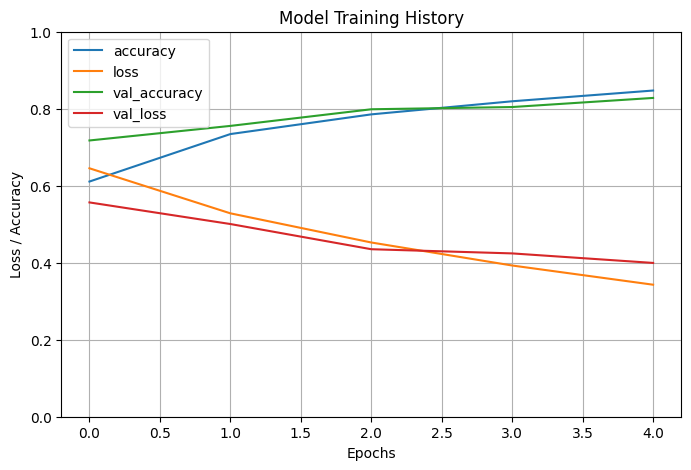

In [ ]:
# EVALUATE AND VISUALIZE PERFORMANCE
# -------------------------------------
# Plotting the learning curves
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # Set the vertical range to [0-1]
plt.title("Model Training History")
plt.xlabel("Epochs")
plt.ylabel("Loss / Accuracy")
plt.legend(loc='best')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


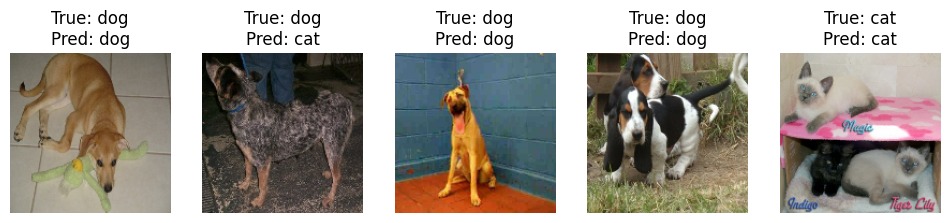

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf # Import tensorflow

# Get class names (cats = 0, dogs = 1)
class_names = info.features["label"].names

# Pick a batch from validation set
for images, labels in val_ds.take(1):  # just one batch
    # Pick 5 random samples from the batch
    idx = np.random.choice(range(images.shape[0]), size=5, replace=False)
    # Convert idx to a TensorFlow tensor before using it to index
    sample_images = tf.gather(images, idx)
    sample_labels = tf.gather(labels, idx)

    # Make predictions
    preds = model.predict(sample_images)
    preds = (preds > 0.5).astype("int32").flatten()  # convert to 0/1

    # Plot results
    plt.figure(figsize=(12, 6))
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(sample_images[i])
        plt.axis("off")
        plt.title(f"True: {class_names[sample_labels[i]]}\nPred: {class_names[preds[i]]}")
    plt.show()